# This notebook is code to accompany article Machine Learning Explainability Introduction via eli5

Article: https://towardsdatascience.com/machine-learning-explainability-introduction-via-eli5-99c767f017e2?sk=08b69dee4b71ced84f94029d33c70006

In [1]:
import seaborn as sns
mpg = sns.load_dataset('mpg')

In [2]:
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [3]:
mpg.drop(['origin', 'name'], axis =1, inplace = True)
mpg.dropna(inplace = True)

# Setting up Predictive Model

In [4]:
import statsmodels.api as sm
from statsmodels.api import OLS

sm_lm = OLS(mpg['mpg'], sm.add_constant(mpg.drop('mpg', axis = 1)))
result = sm_lm.fit()

In [5]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.809
Model:                            OLS   Adj. R-squared:                  0.806
Method:                 Least Squares   F-statistic:                     272.2
Date:                Mon, 29 Jun 2020   Prob (F-statistic):          3.79e-135
Time:                        09:10:03   Log-Likelihood:                -1036.5
No. Observations:                 392   AIC:                             2087.
Df Residuals:                     385   BIC:                             2115.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -14.5353      4.764     -3.051      0.002     -23.902      -5.169
cylinders       -0.3299      0.332     -0.993      0.321      -0.983       0.323
displacement     0.0077      0.007      1.044      0.297      -0.007       0.022
horsepower      -0.0004      0.014     -0.028      0.977      -0.028       0.027
weight          -0.0068      0.001    -10.141      0.000      -0.008      -0.005
acceleration     0.0853      0.102      0.836      0.404      -0.115       0.286
model_year       0.7534      0.053     14.318      0.000       0.650       0.857
==============================================================================
Omnibus:                       37.865   Durbin-Watson:                   1.232
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               60.248
Skew:                           0.630   Prob(JB):                     8.26e-14
Kurtosis:                       4.449   Cond. No.                     8.53e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.53e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

$y = c + m_1x_1 + m_2x_2 +...+m_nx_n$

In [6]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
mpg = sns.load_dataset('mpg')
mpg.drop('name', axis =1 , inplace = True)
mpg.dropna(inplace = True)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(mpg.drop('origin', axis = 1), mpg['origin'], test_size = 0.2, 
                                                    random_state = 121)

In [8]:
y_train

85        usa
371       usa
353    europe
388       usa
392       usa
        ...  
182    europe
66        usa
96        usa
266       usa
324     japan
Name: origin, Length: 313, dtype: object

In [9]:
xgb_clf = XGBClassifier()
xgb_clf.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [10]:
xgb_clf.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [11]:
xgb_clf.feature_importances_

array([0.13363299, 0.17301995, 0.30078474, 0.13703737, 0.09336334,
       0.08694448, 0.07521716], dtype=float32)

Text(0.5, 1.0, 'Feature Importances')

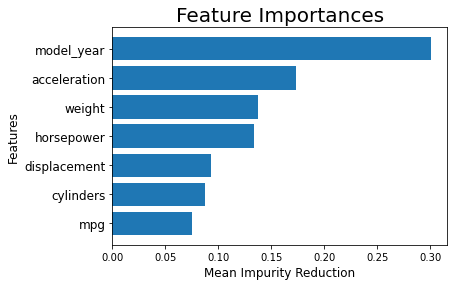

In [12]:
tree_feature =  pd.Series(xgb_clf.feature_importances_, X_train.columns).sort_values(ascending = True)

plt.barh(X_train.columns, tree_feature)
plt.xlabel('Mean Impurity Reduction', fontsize = 12)
plt.ylabel('Features', fontsize = 12)
plt.yticks(fontsize = 12)
plt.title('Feature Importances', fontsize = 20)

# Using eli5

In [13]:
from eli5 import show_weights
from eli5.sklearn import PermutationImportance


perm = PermutationImportance(xgb_clf, scoring = 'accuracy' ,random_state=101).fit(X_test, y_test)
show_weights(perm, feature_names = list(X_test.columns))

C:\Users\MSI\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\Users\MSI\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.feature_selection.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection. Anything that cannot be imported from sklearn.feature_selection is now part of the private API.
  warnings.warn(message, FutureWarning)
Using TensorFlow backend.


Weight,Feature
0.3797 ± 0.0577,displacement
0.0785 ± 0.0405,weight
0.0329 ± 0.0441,horsepower
0.0127 ± 0.0160,cylinders
0.0101 ± 0.0372,acceleration
-0.0051 ± 0.0124,model_year
-0.0152 ± 0.0405,mpg


In [24]:
from eli5 import show_weights

show_weights(xgb_clf, importance_type = 'gain')

Weight,Feature
0.3008,displacement
0.1730,cylinders
0.1370,horsepower
0.1336,mpg
0.0934,weight
0.0869,acceleration
0.0752,model_year


In [22]:
from eli5 import show_prediction
show_prediction(xgb_clf, X_test.iloc[1], show_feature_values=True)

In [19]:
X_test.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
114,26.0,4,98.0,90.0,2265,15.5,73
80,22.0,4,122.0,86.0,2395,16.0,72
209,19.0,4,120.0,88.0,3270,21.9,76
128,15.0,6,250.0,100.0,3336,17.0,74
395,32.0,4,135.0,84.0,2295,11.6,82
